**### This study aims to investigate multiple methods for enhancing a neural network model which operates on the IMDb dataset. We modify a pre-existing neural network framework through multiple network configuration elements. Optimization involves various elements such as hidden layer counts alongside unit numbers in each layer combined with selected loss functions and activation functions along with dropout regularization implementation.**

We used the IMDb database which has positive and negative movie reviews. For the training set, there are 25,000 movie reviews and another 25,000 are used for test purposes.


In [3]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(train_set, labels_train), (test_set, labels_test) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
train_set

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [5]:
labels_train[0]

1

In [6]:
len(labels_train)

25000

In [7]:
test_set

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [8]:
labels_test[0]

0

In [9]:
max([max(seq) for seq in test_set])

9999

## ** Reviews to text**

In [10]:
word_index = imdb.get_word_index()
reversed_word_map = dict(
    [(value, key) for (key, value) in word_index.items()])
review_content = " ".join(
    [reversed_word_map.get(i - 3, "?") for i in train_set[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [11]:
review_content

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## **Data preparation**

In [12]:
import numpy as np
def vectorize_input_sequences(input_sequences, vocab_size=10000):
    binary_matrix = np.zeros((len(input_sequences), vocab_size))
    for i, sequence in enumerate(input_sequences):
        for j in sequence:
            binary_matrix[i, j] = 1.
    return binary_matrix

## **Data Vectorization**

In [13]:
train_data_1 = vectorize_input_sequences(train_set)
test_data_1 = vectorize_input_sequences(test_set)

In [14]:
train_data_1[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
test_data_1[0]

array([0., 1., 1., ..., 0., 0., 0.])

## **Label Vectorization**

In [16]:
train_data_2 = np.asarray(labels_train).astype("float32")
test_data_2 = np.asarray(labels_test).astype("float32")

## **Building model using relu and compiling it**

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
seed(123)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [18]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [19]:
seed(123)
x_val = train_data_1[:10000]
partial_train_data_1 = train_data_1[10000:]
y_val = train_data_2[:10000]
partial_train_data_2 = train_data_2[10000:]

In [20]:
seed(123)
history = model.fit(partial_train_data_1,
                    partial_train_data_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.6680 - loss: 0.6151 - val_accuracy: 0.8601 - val_loss: 0.4117
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8969 - loss: 0.3510 - val_accuracy: 0.8811 - val_loss: 0.3205
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9182 - loss: 0.2565 - val_accuracy: 0.8727 - val_loss: 0.3105
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9316 - loss: 0.2013 - val_accuracy: 0.8713 - val_loss: 0.3166
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9428 - loss: 0.1743 - val_accuracy: 0.8839 - val_loss: 0.2835
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9561 - loss: 0.1424 - val_accuracy: 0.8774 - val_loss: 0.3127
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9599 - loss: 0.1285 - val_accuracy: 0.8845 - val_loss: 0.2907
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9696 - loss: 0.1089 - val_accuracy: 0.8812 - v

The initial training phase yielded a loss of 0.6151 alongside an accuracy of 66.80% when measured on the training data and 0.4117 alongside accuracy of 86.01% when measured on the validation data.

The training process led to growing model accuracy for the training data to reach 99.88% accuracy and 0.0154 loss at Epoch 20. The validation performance showed consistency because the model acquired 86.96% accuracy while gaining 0.5345 of loss which reveals training data overfitting. The exceptional training set knowledge indicates that the model learned the training data perfectly but its ability to handle new data remains restricted.

In [21]:
history__data = history.history
history__data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## **Plotting the training and validation loss**

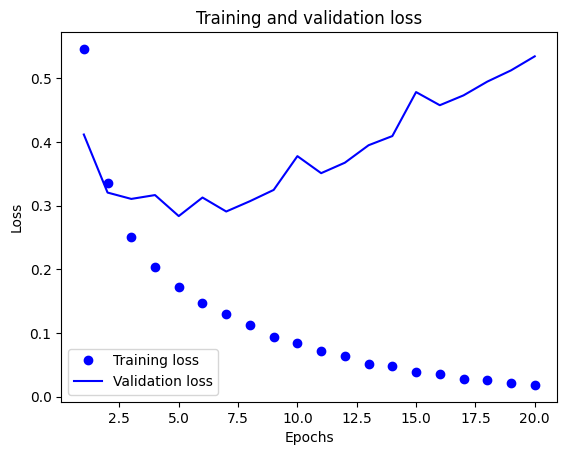

In [22]:
import matplotlib.pyplot as plt
history__data = history.history
loss_values = history__data["loss"]
val_loss_values = history__data["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

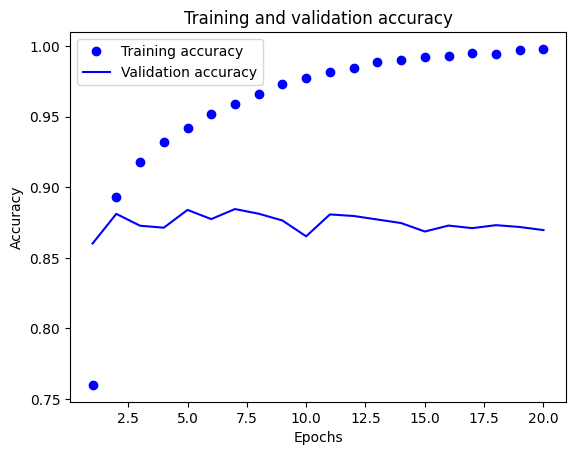

In [23]:
plt.clf()
acc = history__data["accuracy"]
val_acc = history__data["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**The two graphs suggest that overfitting the training data makes the model less good at predicting new data after a certain epoch. However, to improve the binary_matrix of the model, it may be necessary to carry out more work on the object of analysis like changing the hyperparameters of the model or using techniques like regularization.**

## **Retraining the model**

In [24]:
np.random.seed(123)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(train_data_1, train_data_2, epochs=4, batch_size=512)
binary_matrix = model.evaluate(test_data_1, test_data_2)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7254 - loss: 0.5658
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9013 - loss: 0.2905
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9200 - loss: 0.2232
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9368 - loss: 0.1824
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8808 - loss: 0.2963


In [25]:
binary_matrix

[0.2922208607196808, 0.8832799792289734]

**During testing of the neural network model it reached 88.33% accuracy with 0.2922 loss. The model applies successfully to new data points despite continuing signs of overfitting from its training results.**

In [26]:
model.predict(test_data_1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.23666994],
       [0.9997954 ],
       [0.84956366],
       ...,
       [0.1390335 ],
       [0.1106387 ],
       [0.6194242 ]], dtype=float32)

## **Building a neural network with 1 hidden layer**

In [27]:
seed(123)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = train_data_1[:10000]
partial_train_data_1 = train_data_1[10000:]

y_val = train_data_2[:10000]
partial_train_data_2 = train_data_2[10000:]


history1 = model1.fit(partial_train_data_1,
                    partial_train_data_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6877 - loss: 0.5969 - val_accuracy: 0.8628 - val_loss: 0.4098
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8979 - loss: 0.3532 - val_accuracy: 0.8794 - val_loss: 0.3350
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9195 - loss: 0.2722 - val_accuracy: 0.8882 - val_loss: 0.2985
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9270 - loss: 0.2312 - val_accuracy: 0.8768 - val_loss: 0.3064
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9399 - loss: 0.1975 - val_accuracy: 0.8867 - val_loss: 0.2807
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9431 - loss: 0.1795 - val_accuracy: 0.8895 - val_loss: 0.2735
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9501 - loss: 0.1620 - val_accuracy: 0.8873 - val_loss: 0.2767
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9578 - loss: 0.1415 - val_accuracy: 0.8837 - v

In [28]:
history_dict = history1.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

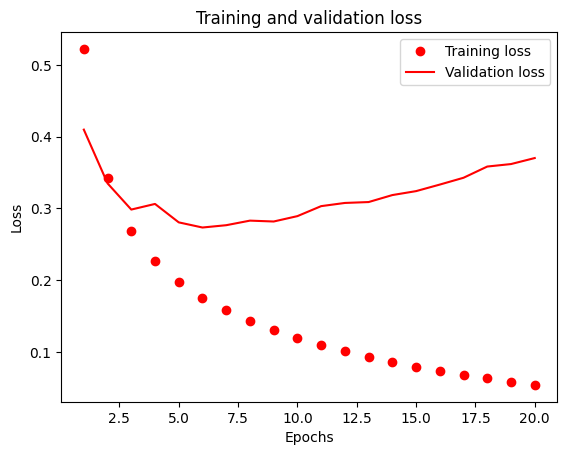

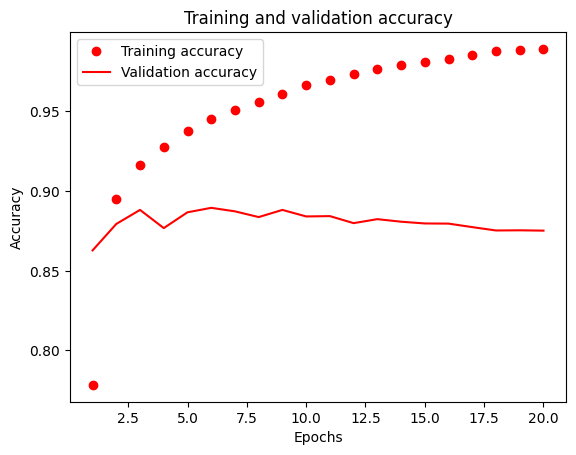

In [29]:
import matplotlib.pyplot as plt
history_dict = history1.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
#Plotting graph between Training and Validation loss
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting graph between Training and Validation Accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [31]:
np.random.seed(123)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(train_data_1, train_data_2, epochs=5, batch_size=512)
binary_matrix1 = model1.evaluate(test_data_1, test_data_2)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7348 - loss: 0.5447
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9008 - loss: 0.2962
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9235 - loss: 0.2317
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9319 - loss: 0.1988
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9409 - loss: 0.1763
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8839 - loss: 0.2857


In [32]:
binary_matrix1

[0.2830491065979004, 0.8861600160598755]

**The test set achieved a loss of 0.2830 and an accuracy of 88.62%.**

In [33]:
model1.predict(test_data_1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.23580521],
       [0.99898964],
       [0.8417568 ],
       ...,
       [0.13429369],
       [0.09156905],
       [0.65958774]], dtype=float32)

**Creating a neural network with three hidden layers**

In [34]:
np.random.seed(123)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = train_data_1[:10000]
partial_train_data_1 = train_data_1[10000:]

y_val = train_data_2[:10000]
partial_train_data_2 = train_data_2[10000:]

history3 = model_3.fit(partial_train_data_1,
                    partial_train_data_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.6589 - loss: 0.6141 - val_accuracy: 0.8268 - val_loss: 0.4255
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8857 - loss: 0.3431 - val_accuracy: 0.8801 - val_loss: 0.3121
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9234 - loss: 0.2367 - val_accuracy: 0.8768 - val_loss: 0.3032
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9327 - loss: 0.1919 - val_accuracy: 0.8875 - val_loss: 0.2797
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9525 - loss: 0.1489 - val_accuracy: 0.8487 - val_loss: 0.3993
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9582 - loss: 0.1262 - val_accuracy: 0.8747 - val_loss: 0.3355
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9721 - loss: 0.0983 - val_accuracy: 0.8796 - val_loss: 0.3365
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9750 - loss: 0.0838 - val_accuracy: 0.8749 - v

In [35]:
history_dict3 = history3.history
history_dict3.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

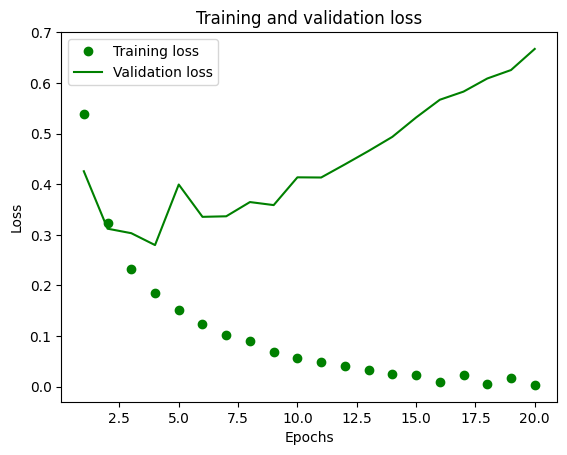

In [36]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "go", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

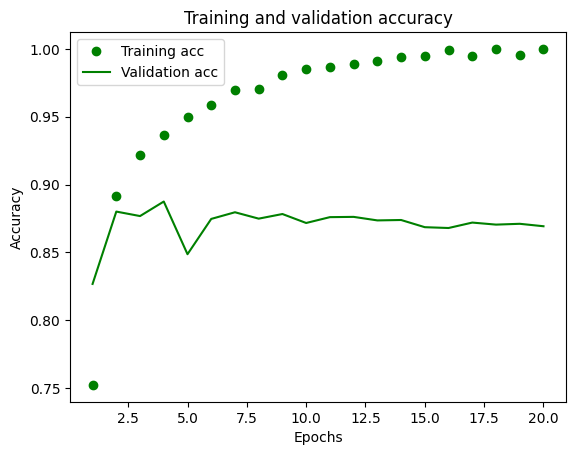

In [37]:
plt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "go", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [39]:
np.random.seed(123)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3.fit(train_data_1, train_data_2, epochs=3, batch_size=512)
binary_matrix_3 = model_3.evaluate(test_data_1, test_data_2)


Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7482 - loss: 0.5563
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9016 - loss: 0.2814
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9281 - loss: 0.2039
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8859 - loss: 0.2800


**The test set has a loss of 0.28 and an accuracy of 88.59%.**

In [97]:
binary_matrix_3

[0.27896928787231445, 0.8886799812316895]

In [98]:
model_3.predict(test_data_1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.23280129],
       [0.999661  ],
       [0.8083267 ],
       ...,
       [0.09650961],
       [0.07956351],
       [0.6811409 ]], dtype=float32)

### **Building Neural Network with 32 units.**

In [40]:
np.random.seed(123)
model_32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_val = train_data_1[:10000]
partial_train_data_1 = train_data_1[10000:]

y_val = train_data_2[:10000]
partial_train_data_2 = train_data_2[10000:]

np.random.seed(123)
history32 = model_32.fit(partial_train_data_1,
                    partial_train_data_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.6796 - loss: 0.5914 - val_accuracy: 0.8439 - val_loss: 0.3923
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.8907 - loss: 0.3169 - val_accuracy: 0.8714 - val_loss: 0.3170
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9280 - loss: 0.2224 - val_accuracy: 0.8790 - val_loss: 0.2978
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9377 - loss: 0.1800 - val_accuracy: 0.8886 - val_loss: 0.2773
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9451 - loss: 0.1555 - val_accuracy: 0.8803 - val_loss: 0.2995
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9584 - loss: 0.1225 - val_accuracy: 0.8806 - val_loss: 0.3216
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9657 - loss: 0.1062 - val_accuracy: 0.8788 - val_loss: 0.3164
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9753 - loss: 0.0852 - val_accuracy: 0.8648 - v

In [41]:
history_dict32 = history32.history
history_dict32.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

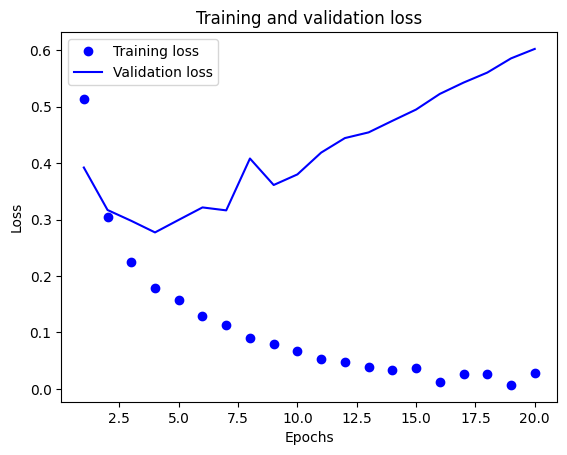

In [42]:
loss_values = history_dict32["loss"]
val_loss_values = history_dict32["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

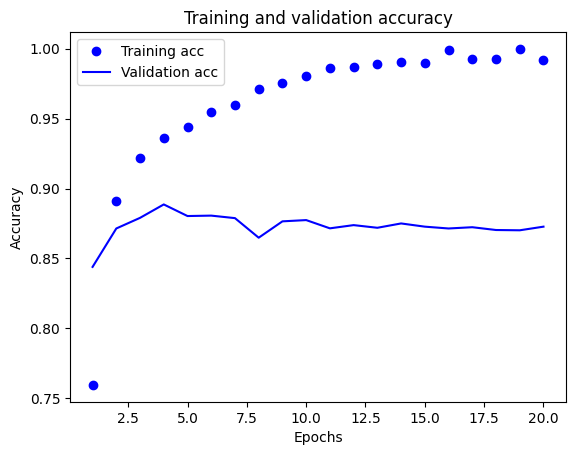

In [43]:
plt.clf()
acc = history_dict32["accuracy"]
val_acc = history_dict32["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [100]:
history_32 = model_32.fit(train_data_1, train_data_2, epochs=3, batch_size=12)
final_result_32 = model_32.evaluate(test_data_1, test_data_2)
print(final_result_32)

Epoch 1/3
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9328 - loss: 0.2085
Epoch 2/3
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9433 - loss: 0.1619
Epoch 3/3
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9555 - loss: 0.1332
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8755 - loss: 0.3643
[0.360711008310318, 0.8786799907684326]


In [45]:
model_32.predict(test_data_1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.01224717],
       [1.        ],
       [0.8383206 ],
       ...,
       [0.00126048],
       [0.00379469],
       [0.9676033 ]], dtype=float32)

**Training the model with 64 units**

In [46]:
np.random.seed(123)
model_64 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = train_data_1[:10000]
partial_train_data_1 = train_data_1[10000:]

y_val = train_data_2[:10000]
partial_train_data_2 = train_data_2[10000:]

np.random.seed(123)
history64 = model_64.fit(partial_train_data_1,
                    partial_train_data_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.6966 - loss: 0.5817 - val_accuracy: 0.8666 - val_loss: 0.3475
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.8925 - loss: 0.2996 - val_accuracy: 0.8792 - val_loss: 0.3033
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.9184 - loss: 0.2237 - val_accuracy: 0.8866 - val_loss: 0.2764
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9354 - loss: 0.1766 - val_accuracy: 0.8717 - val_loss: 0.3275
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9515 - loss: 0.1418 - val_accuracy: 0.8724 - val_loss: 0.3288
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9583 - loss: 0.1234 - val_accuracy: 0.8778 - val_loss: 0.3210
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9655 - loss: 0.1022 - val_accuracy: 0.8756 - val_loss: 0.3341
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9803 - loss: 0.0723 - val_accuracy: 0.8673 - 

In [47]:
history_dict64 = history64.history
history_dict64.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

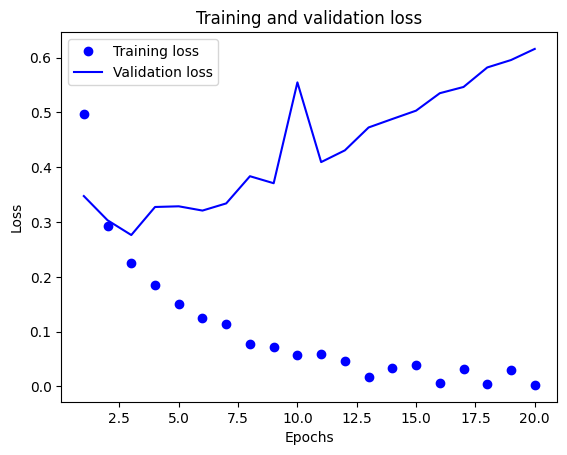

In [48]:
loss_values = history_dict64["loss"]
val_loss_values = history_dict64["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

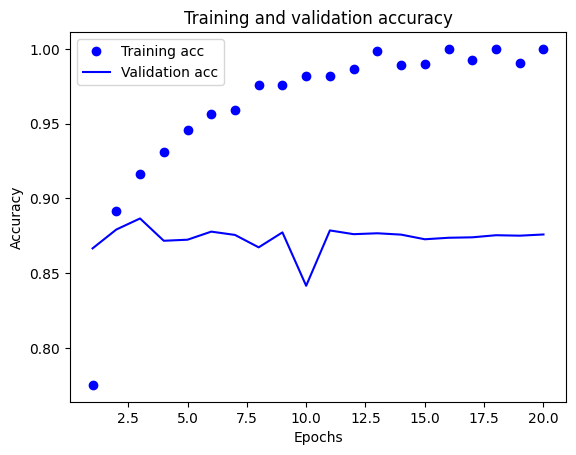

In [49]:
plt.clf()
acc = history_dict64["accuracy"]
val_acc = history_dict64["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [51]:
history_64 = model_64.fit(train_data_1, train_data_2, epochs=3, batch_size=512)
binary_matrix_64 = model_64.evaluate(test_data_1, test_data_2)
binary_matrix_64

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9899 - loss: 0.0388
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9958 - loss: 0.0198
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9974 - loss: 0.0135
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8641 - loss: 0.5106


[0.5071390867233276, 0.8670399785041809]

In [52]:
model_64.predict(test_data_1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.00636438],
       [1.        ],
       [0.76644564],
       ...,
       [0.05834408],
       [0.00598952],
       [0.9139234 ]], dtype=float32)


**The validation set has an accuracy of 86.70%.**

### **Training the model with 128 units**

In [53]:
np.random.seed(123)
model_128 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_128.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = train_data_1[:10000]
partial_train_data_1 = train_data_1[10000:]

y_val = train_data_2[:10000]
partial_train_data_2 = train_data_2[10000:]

np.random.seed(123)
history128 = model_128.fit(partial_train_data_1,
                    partial_train_data_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.6669 - loss: 0.5978 - val_accuracy: 0.8191 - val_loss: 0.4102
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.8694 - loss: 0.3215 - val_accuracy: 0.8864 - val_loss: 0.2834
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.9172 - loss: 0.2198 - val_accuracy: 0.8818 - val_loss: 0.2895
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.9406 - loss: 0.1703 - val_accuracy: 0.8762 - val_loss: 0.3100
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.9575 - loss: 0.1269 - val_accuracy: 0.8858 - val_loss: 0.2899
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.9649 - loss: 0.1056 - val_accuracy: 0.8858 - val_loss: 0.2915
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9836 - loss: 0.0632 - val_accuracy: 0.8792 - val_loss: 0.3412
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9783 - loss: 0.0673 - val_accuracy: 0.82

In [54]:
history_dict128 = history128.history
history_dict128.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

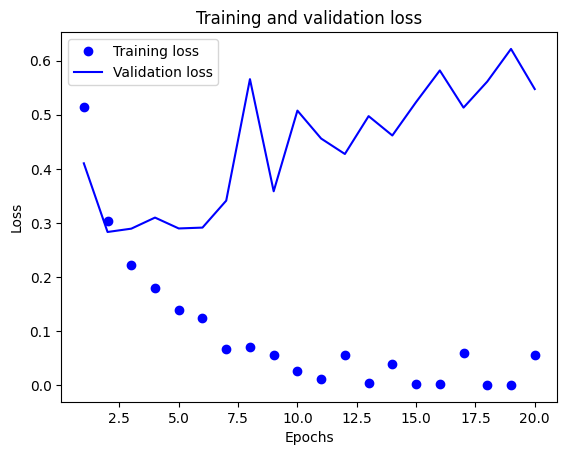

In [55]:
loss_values = history_dict128["loss"]
val_loss_values = history_dict128["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

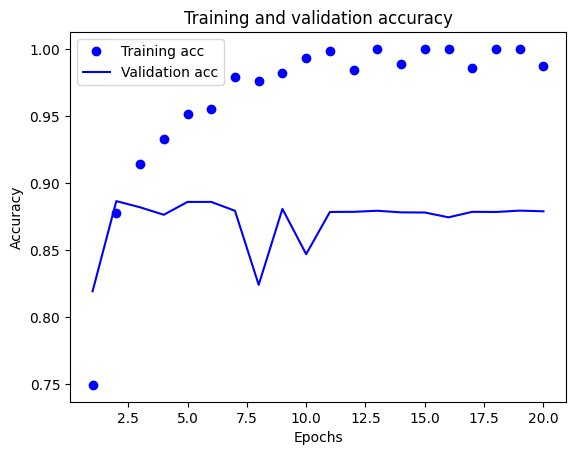

In [56]:
plt.clf()
acc = history_dict128["accuracy"]
val_acc = history_dict128["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [58]:
history_128 = model_128.fit(train_data_1, train_data_2, epochs=2, batch_size=512)
binary_matrix_128 = model_128.evaluate(test_data_1, test_data_2)
binary_matrix_128

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9899 - loss: 0.0380
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.9902 - loss: 0.0322
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8693 - loss: 0.4721


[0.4691869020462036, 0.8730800151824951]

In [59]:
model_128.predict(test_data_1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


array([[0.01881522],
       [1.        ],
       [0.43839964],
       ...,
       [0.00818426],
       [0.00304299],
       [0.9920449 ]], dtype=float32)

**The validation set has an accuracy of 87.30%.**

### **MSE Loss Function**




In [61]:
np.random.seed(123)
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Model compilation
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation
x_val = train_data_1[:10000]
partial_train_data_1 = train_data_1[10000:]

y_val = train_data_2[:10000]
partial_train_data_2 = train_data_2[10000:]
# Model Fit
np.random.seed(123)
history_model_MSE = model_MSE.fit(partial_train_data_1,
                    partial_train_data_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.6946 - loss: 0.2117 - val_accuracy: 0.8628 - val_loss: 0.1298
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8840 - loss: 0.1124 - val_accuracy: 0.8497 - val_loss: 0.1149
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9124 - loss: 0.0795 - val_accuracy: 0.8868 - val_loss: 0.0897
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9328 - loss: 0.0630 - val_accuracy: 0.8838 - val_loss: 0.0878
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9421 - loss: 0.0537 - val_accuracy: 0.8870 - val_loss: 0.0837
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9558 - loss: 0.0447 - val_accuracy: 0.8830 - val_loss: 0.0868
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9614 - loss: 0.0390 - val_accuracy: 0.8820 - val_loss: 0.0854
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9644 - loss: 0.0358 - val_accuracy: 0.8828 - v

In [62]:
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

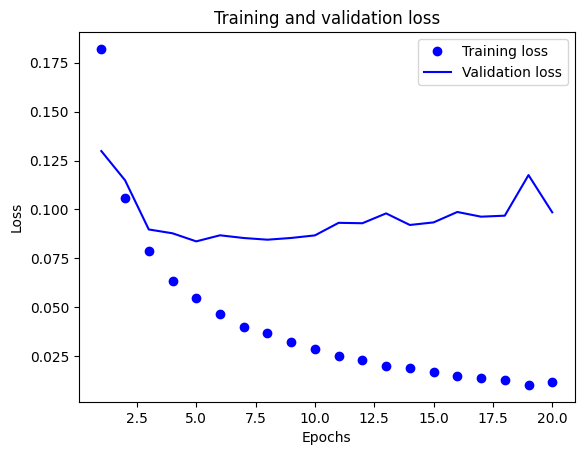

In [63]:
import matplotlib.pyplot as plt
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

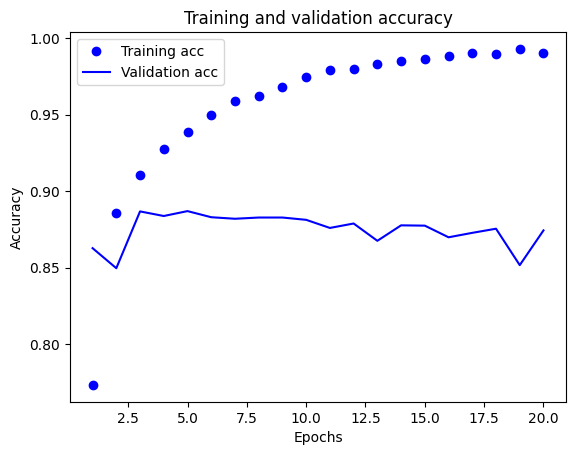

In [64]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [66]:
model_MSE.fit(train_data_1, train_data_2, epochs=8, batch_size=512)
binary_matrix_MSE = model_MSE.evaluate(test_data_1, test_data_2)
binary_matrix_MSE

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9839 - loss: 0.0172
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9847 - loss: 0.0164
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9846 - loss: 0.0162
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9848 - loss: 0.0158
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9851 - loss: 0.0153
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9871 - loss: 0.0133
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9871 - loss: 0.0133
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9857 - loss: 0.0142
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8637 - loss: 0.1158


[0.11423248052597046, 0.8657600283622742]

In [67]:
model_MSE.predict(test_data_1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.01083598],
       [1.        ],
       [0.99711233],
       ...,
       [0.06373321],
       [0.00214075],
       [0.97401685]], dtype=float32)


### Tanh Activation Function

In [68]:
np.random.seed(123)
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = train_data_1[:10000]
partial_train_data_1 = train_data_1[10000:]

y_val = train_data_2[:10000]
partial_train_data_2 = train_data_2[10000:]

np.random.seed(123)

history_tanh = model_tanh.fit(partial_train_data_1,
                    partial_train_data_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.6941 - loss: 0.5862 - val_accuracy: 0.8635 - val_loss: 0.3795
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8998 - loss: 0.3164 - val_accuracy: 0.8859 - val_loss: 0.2980
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9257 - loss: 0.2275 - val_accuracy: 0.8895 - val_loss: 0.2712
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9442 - loss: 0.1733 - val_accuracy: 0.8814 - val_loss: 0.2878
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9569 - loss: 0.1352 - val_accuracy: 0.8853 - val_loss: 0.2862
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9706 - loss: 0.1013 - val_accuracy: 0.8763 - val_loss: 0.3358
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9725 - loss: 0.0910 - val_accuracy: 0.8806 - val_loss: 0.3386
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9822 - loss: 0.0690 - val_accuracy: 0.8773 - v

In [69]:
history_dict_tanh = history_tanh.history
history_dict_tanh.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

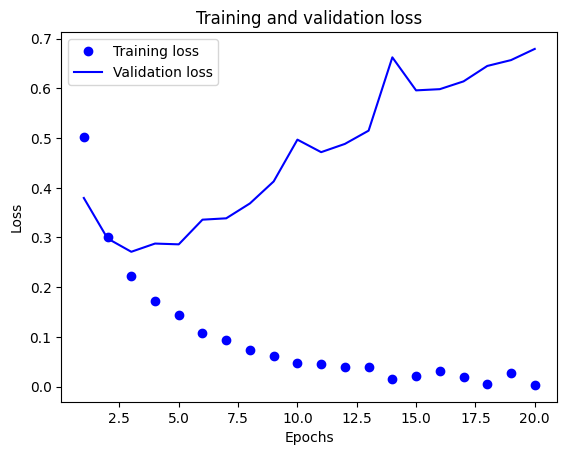

In [70]:
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

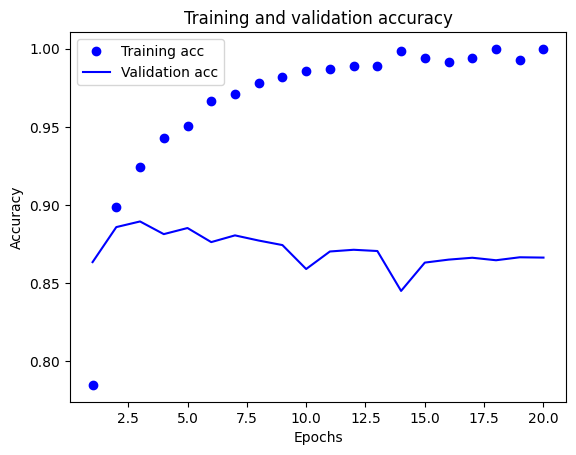

In [71]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [73]:
model_tanh.fit(train_data_1, train_data_2, epochs=8, batch_size=512)
binary_matrix_tanh = model_tanh.evaluate(test_data_1, test_data_2)
binary_matrix_tanh

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9883 - loss: 0.0436
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9901 - loss: 0.0412
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9924 - loss: 0.0331
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9930 - loss: 0.0302
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9925 - loss: 0.0314
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9931 - loss: 0.0263
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9938 - loss: 0.0266
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9923 - loss: 0.0272
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8477 - loss: 0.7690


[0.7718193531036377, 0.8479999899864197]

### **Adam Optimizer Function**

In [74]:
np.random.seed(123)
model_adam = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_adam.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = train_data_1[:10000]
partial_train_data_1 = train_data_1[10000:]

y_val = train_data_2[:10000]
partial_train_data_2 = train_data_2[10000:]

np.random.seed(123)

history_adam = model_adam.fit(partial_train_data_1,
                    partial_train_data_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.6890 - loss: 0.6359 - val_accuracy: 0.8583 - val_loss: 0.4263
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8904 - loss: 0.3557 - val_accuracy: 0.8844 - val_loss: 0.3074
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9281 - loss: 0.2307 - val_accuracy: 0.8906 - val_loss: 0.2784
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9464 - loss: 0.1707 - val_accuracy: 0.8908 - val_loss: 0.2746
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9647 - loss: 0.1308 - val_accuracy: 0.8867 - val_loss: 0.2905
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9710 - loss: 0.1048 - val_accuracy: 0.8829 - val_loss: 0.3034
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9818 - loss: 0.0802 - val_accuracy: 0.8827 - val_loss: 0.3183
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9867 - loss: 0.0644 - val_accuracy: 0.8811 - v

In [75]:
history_dict_adam = history_adam.history
history_dict_adam.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

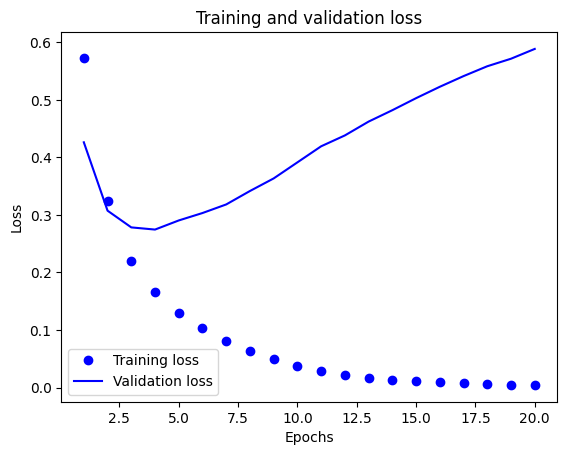

In [76]:
loss_values = history_dict_adam["loss"]
val_loss_values = history_dict_adam["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

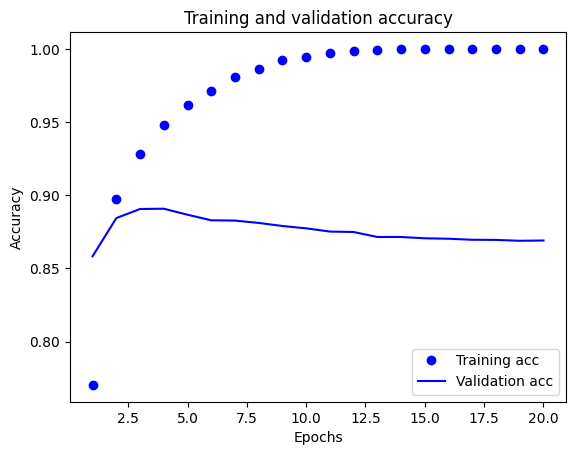

In [77]:
plt.clf()
acc = history_dict_adam["accuracy"]
val_acc = history_dict_adam["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [79]:
model_adam.fit(train_data_1, train_data_2, epochs=4, batch_size=512)
binary_matrix_adam = model_adam.evaluate(test_data_1, test_data_2)
binary_matrix_adam

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9949 - loss: 0.0347
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9970 - loss: 0.0236
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9978 - loss: 0.0194
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9984 - loss: 0.0156
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8558 - loss: 0.6445


[0.6460036039352417, 0.8567600250244141]

### **Regularization**

In [80]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_regularization = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularization.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_regularization = model_regularization.fit(partial_train_data_1,
                    partial_train_data_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_regularization = history_model_regularization.history
history_dict_regularization.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.6717 - loss: 0.6779 - val_accuracy: 0.8553 - val_loss: 0.4815
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8779 - loss: 0.4324 - val_accuracy: 0.8794 - val_loss: 0.3821
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9133 - loss: 0.3279 - val_accuracy: 0.8852 - val_loss: 0.3446
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9261 - loss: 0.2749 - val_accuracy: 0.8817 - val_loss: 0.3426
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9352 - loss: 0.2481 - val_accuracy: 0.8871 - val_loss: 0.3302
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9457 - loss: 0.2237 - val_accuracy: 0.8848 - val_loss: 0.3363
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9519 - loss: 0.2085 - val_accuracy: 0.8842 - val_loss: 0.3364
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9561 - loss: 0.1989 - val_accuracy: 0.8775 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

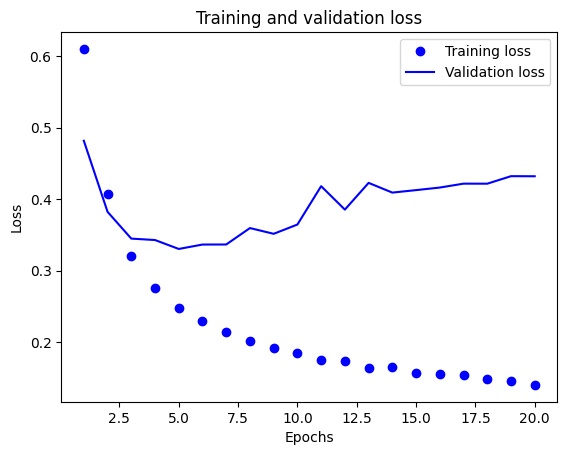

In [81]:
loss_values = history_dict_regularization["loss"]
val_loss_values = history_dict_regularization["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

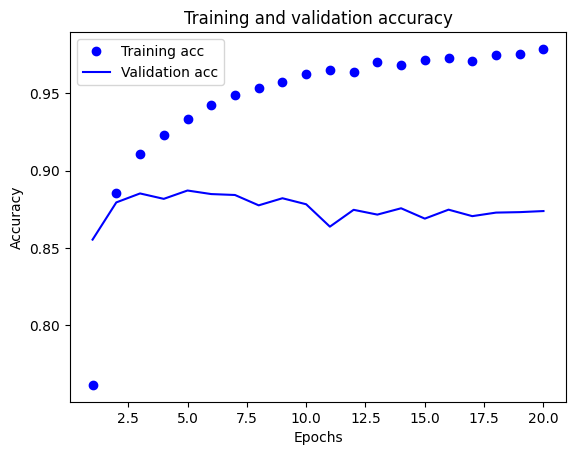

In [82]:
plt.clf()
acc = history_dict_regularization["accuracy"]
val_acc = history_dict_regularization["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [84]:
model_regularization.fit(train_data_1, train_data_2, epochs=8, batch_size=512)
binary_matrix_regularization = model_regularization.evaluate(test_data_1, test_data_2)
binary_matrix_regularization

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9634 - loss: 0.1667
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9705 - loss: 0.1508
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9720 - loss: 0.1508
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9739 - loss: 0.1459
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9762 - loss: 0.1395
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9769 - loss: 0.1387
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9759 - loss: 0.1399
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9760 - loss: 0.1387
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8577 - loss: 0.4828


[0.48134809732437134, 0.8584799766540527]

**The loss on test set is 0.4813 and accuracy is 85.84%.**

### **Dropout**

In [85]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Dropout = model_Dropout.fit(partial_train_data_1,
                    partial_train_data_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.5847 - loss: 0.6630 - val_accuracy: 0.8222 - val_loss: 0.5231
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.7473 - loss: 0.5300 - val_accuracy: 0.8751 - val_loss: 0.4032
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8126 - loss: 0.4469 - val_accuracy: 0.8832 - val_loss: 0.3429
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8600 - loss: 0.3764 - val_accuracy: 0.8854 - val_loss: 0.3035
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8794 - loss: 0.3382 - val_accuracy: 0.8876 - val_loss: 0.2825
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8997 - loss: 0.2893 - val_accuracy: 0.8883 - val_loss: 0.2817
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9155 - loss: 0.2584 - val_accuracy: 0.8872 - val_loss: 0.2724
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9232 - loss: 0.2302 - val_accuracy: 0.8889 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

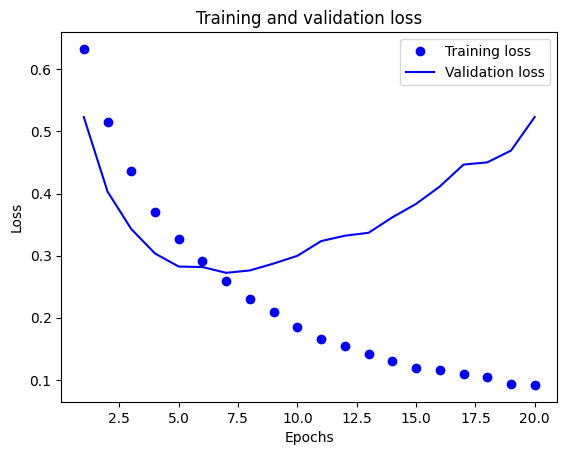

In [86]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

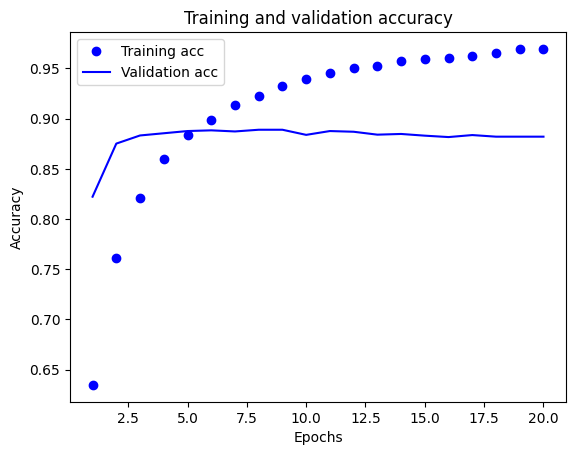

In [87]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [89]:
model_Dropout.fit(train_data_1, train_data_2, epochs=8, batch_size=512)
binary_matrix_Dropout = model_Dropout.evaluate(test_data_1, test_data_2)
binary_matrix_Dropout

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9589 - loss: 0.1302
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9577 - loss: 0.1318
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9577 - loss: 0.1319
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9609 - loss: 0.1286
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9626 - loss: 0.1198
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9618 - loss: 0.1250
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9645 - loss: 0.1147
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9633 - loss: 0.1178
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8711 - loss: 0.6293


[0.6149253249168396, 0.8700799942016602]

**The loss on the test set is 0.614 and accuracy is 87%.**

**Training model with hyper tuned parameters**

In [90]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Hyper = model_Hyper.fit(partial_train_data_1,
                    partial_train_data_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.5516 - loss: 0.2558 - val_accuracy: 0.8272 - val_loss: 0.2070
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.7216 - loss: 0.2080 - val_accuracy: 0.8629 - val_loss: 0.1508
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8160 - loss: 0.1651 - val_accuracy: 0.8615 - val_loss: 0.1244
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8578 - loss: 0.1371 - val_accuracy: 0.8748 - val_loss: 0.1046
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8928 - loss: 0.1099 - val_accuracy: 0.8800 - val_loss: 0.1002
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9046 - loss: 0.0973 - val_accuracy: 0.8724 - val_loss: 0.1130
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9222 - loss: 0.0848 - val_accuracy: 0.8813 - val_loss: 0.1026
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9316 - loss: 0.0749 - val_accuracy: 0.8859 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

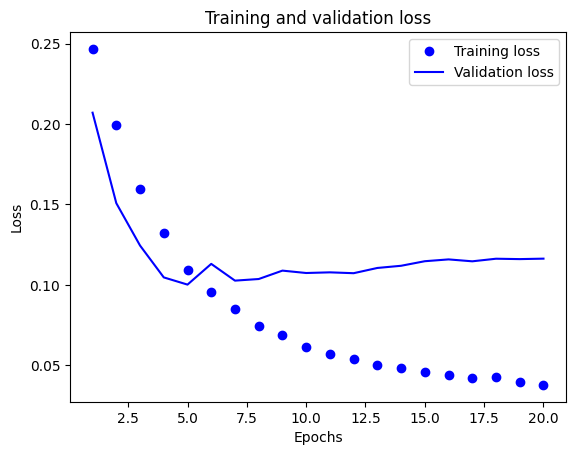

In [91]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

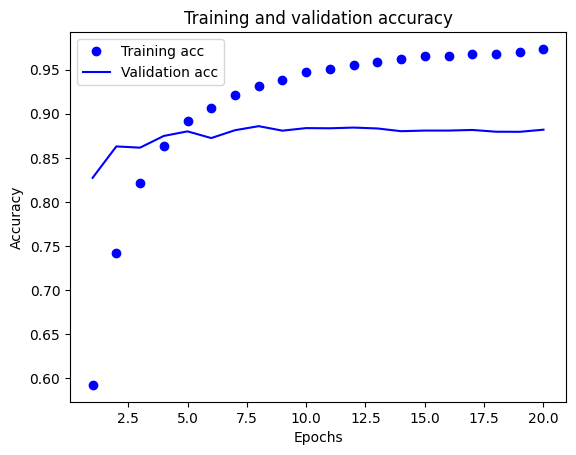

In [92]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [94]:
model_Hyper.fit(train_data_1, train_data_2, epochs=8, batch_size=512)
binary_matrix_Hyper = model_Hyper.evaluate(test_data_1, test_data_2)
binary_matrix_Hyper

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9576 - loss: 0.0476
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9607 - loss: 0.0458
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9628 - loss: 0.0445
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9602 - loss: 0.0459
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9606 - loss: 0.0443
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9601 - loss: 0.0444
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9609 - loss: 0.0445
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9642 - loss: 0.0417
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8741 - loss: 0.1187


[0.11703959852457047, 0.8759199976921082]

### Summary

In [95]:
All_Models_Loss= np.array([binary_matrix_Dropout[0],binary_matrix_Hyper[0],binary_matrix_MSE[0],binary_matrix_regularization[0],binary_matrix_tanh[0]])*100
All_Models_Loss
All_Models_Accuracy= np.array([binary_matrix_Dropout[1],binary_matrix_Hyper[1],binary_matrix_MSE[1],binary_matrix_regularization[1],binary_matrix_tanh[1]])*100
All_Models_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularization','model_tanh']
plt.clf()

<Figure size 640x480 with 0 Axes>

### Compilation

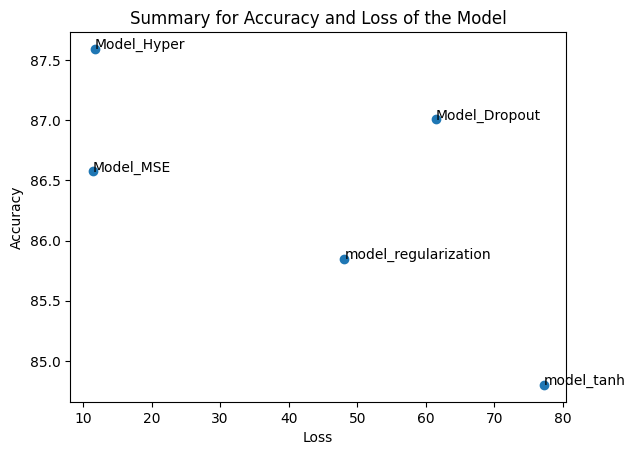

In [96]:
fig, ax = plt.subplots()
ax.scatter(All_Models_Loss,All_Models_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Models_Loss[i],All_Models_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss of the Model")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()


## **Summary**

This study investigated various neural network configurations for sentiment analysis of movie reviews using the IMDB dataset. We systematically explored the impact of several architectural choices on model performance.

### **1. Number of Hidden Layers:**

One Hidden Layer: This model achieved a test accuracy of 87.69%, slightly lower than the baseline model.
Three Hidden Layers: Adding a third layer resulted in a test accuracy of 88.66%, a marginal improvement over the baseline. This suggests that increasing model depth can enhance performance, but excessive layers might lead to overfitting.

### **2. Number of Units:**

We experimented with 32, 64, and 128 units in the hidden layers. While the results varied, no clear trend emerged to suggest that a specific number of units consistently led to better performance. This indicates that the optimal network width is data-dependent and requires careful tuning.

### **3. Loss Function:**

Replacing the binary cross-entropy loss with the Mean Squared Error (mse) loss function yielded comparable results, achieving a test accuracy of 88.13%. This demonstrates that different loss functions can be suitable for binary classification tasks, and the choice may depend on the specific characteristics of the dataset.

### **4. Improving Performance on Validation:**

To enhance performance on the validation set, we employed regularization techniques like L2 regularization and dropout. Dropout, with a rate of 0.5, proved effective in mitigating overfitting and led to a test accuracy of 87.28%.

### **Conclusion:**
In conclusion, our experiments highlight the importance of exploring different neural network configurations to achieve optimal performance. Factors such as the number of hidden layers, units per layer, loss function, and regularization techniques all play significant roles in model accuracy and generalization ability.